In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os
import torch
import torch.nn as nn
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, sampler
import pandas as pd
import copy

In [3]:
lbls = ["segm", "globules", "milia_like_cyst", "negative_network", "pigment_network", "streaks"]

In [4]:
path = "/nfs/home/nduginets/master-diploma/GAN_to_box/test_data/isic_2018_boxes_shifted.csv"
frame = pd.read_csv(path)

In [5]:
indexes = [i for i in range(0, 15)]
indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [6]:
def fetch_histogram(frame, indexes, label_name):
    result_hist = []
    for position in indexes:
        label_offset_x = label_name + "_x_" + str(position)
        label_offset_y = label_name + "_y_" + str(position)
        for idx in frame.index:
            # print(label_offset_y, label_offset_x, idx)
            if frame.at[idx, label_offset_x] != -1:
                result_hist.append(position + 1)
    return result_hist

<Figure size 432x288 with 0 Axes>

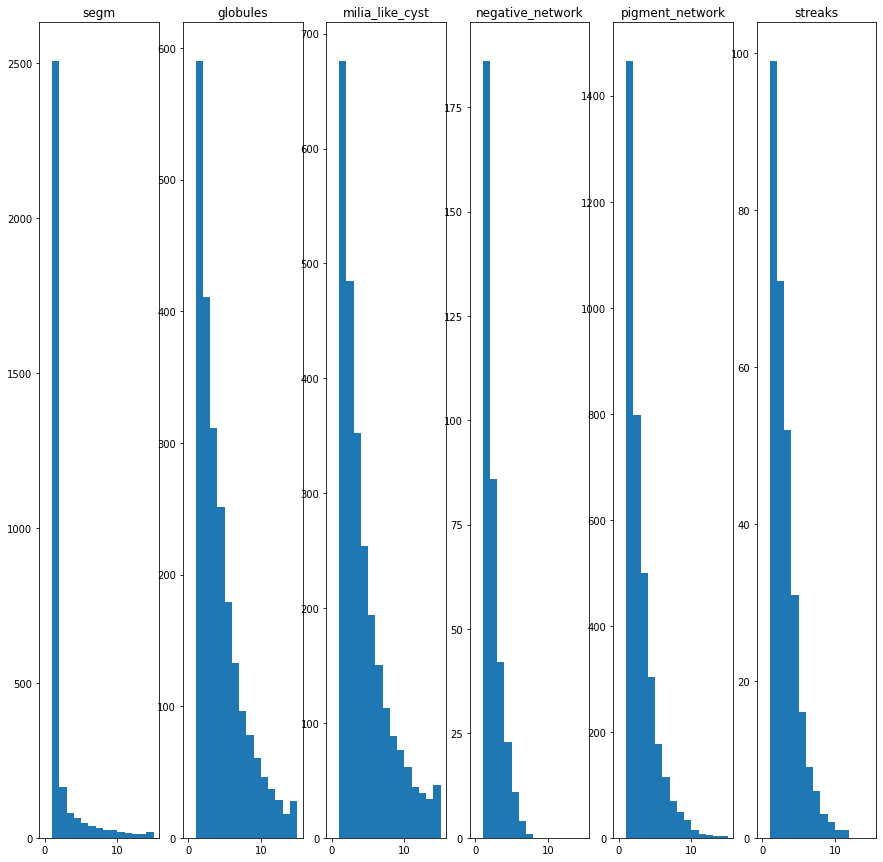

In [7]:
def draw_hist():
    plt.clf()
    fig, plots = plt.subplots(nrows=1, ncols=len(lbls), figsize = (15,15))
    for idx, l in enumerate(lbls):
        hist_res = fetch_histogram(frame, indexes, l)
        plots[idx].hist(hist_res, bins=[i for i in range(0, 16)])
        plots[idx].set_title(l)
    plt.show()
draw_hist()

In [8]:
import dataset_loader as dl
from torch.utils.data import DataLoader

path = "/nfs/home/nduginets/master-diploma/GAN_to_box/test_data/isic_2018_boxes_shifted.csv"
dataset = dl.CSVDataset(path)
dataloader = DataLoader(dataset)

/nfs/home/nduginets/master-diploma/GAN_to_box/dataset_loader.py:26: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  self.pandas_data = pd.read_csv(csv_file, sep=None)


In [9]:
res = [[] for i in range(6)]
for _, d in dataloader:
    for t in range(6):
        for v in range(1, 15): # todo here from 1 because 0 doesn't count
            if d[0][t][v] == 1:
                res[t].append(v)


plt.clf()
fig, plots = plt.subplots(nrows=1, ncols=len(lbls), figsize = (20,20))
for idx, l in enumerate(lbls):
    plots[idx].hist(res[idx], bins=15)
    plots[idx].set_title(l)
plt.show()

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

 # то что распределения не совпадают это ок
 # потому что на первом графике группировка кол-во п-у всего
 # а на втором графике группировка по каждой картинке
 # ну кароч смысл ясен -- в 2 ночи объяснять не хочеца